<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Tukey_test_letters_sorted_1013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

Before everything else, parameters used inside this code should be defined. This is done to make corrections easier and avoid setting them inside the code.

In [443]:
# PARAMETERS
csv_file = '/content/lupina-params-1-sorted.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv
y_height = 10 # height of the graph
y_dist = 2 # distance between labels
parameter = 'Pi_Abs' # required column
x_label = '$\it{L.}$ $\it{albus}$ cultivars' # 'Chickpea ($\mathit{Cicer}$ $\it{arietinum}$) cultivars' # 'grass forage species' # 'L. albus cultivars' # 'Sorghum cultivars' # 'grass forage species' #

title_main = 'PI $_{ABS}$ (performance index)'
y_label = '[rel.u.]'

'''
title_main = 'CO$_2$ uptake (A$_{n}$)'
y_label = r'$\mu$mol m$^{-2}$s$^{-1}$' # CO$_2$'

title_main = 'Concentration of chlorophyll'
y_label = 'cci'

# $\mu$g m$^{-2}$ chl (cci)

title_main =  'PI $_{ABS}$ (performance index)'
y_label = '(a.u.)'

title_main =  '\u03C6 $_{Ro}$'
y_label = '(a.u.)'

# TAC - water extracts
# mM AAE g${^-1}$ '[mg L${^-1}$] AAE'
'''
#
group_order = [
'`1','`4','`6','`25','`28/1','`28/15','`125/16','`125/20','`251/36','`251/3p','`251/8','`254/11','`254/17','`254/18','`425/12','`425/18','`425/25'
]

PARAMETERS - how to represent them as special characters

```'CO$_2$ uptake (A$_{n}$)'```

CO$_2$ uptake (A$_{n}$)

```r'$\mu$mol m$^{-2}$s$^{-1}$' # CO$_2$'```

[$\mu$mol m$^{-2}$s$^{-1}$] CO$_2$

Concentration of chlorophyll

```'$\mu$g m$^{-2}$ chl (cci)'```

$\mu$g m$^{-2}$ chl (cci)

```'PI $_{ABS}$ (performance index)'```

PI $_{ABS}$ (performance index)

```'\u03C6 $_{Ro}$'```
\u03C6 $\phi$ $_{Ro}$
(a.u.)

TAC - water extracts

```'[mM g${^-1}$] AAE'``` [mM g${^-1}$] AAE

####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [447]:
import pandas as pd
import numpy as np
# exp_0726_OJIP_p
df = pd.read_csv(csv_file, delimiter='\t', decimal=',') # delimiter '\t' or ';'

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [448]:
df = df.dropna()
df = df.sort_values(by = 'index', axis=0, ascending=True)

named = np.array(df.pop('groups'))
index = np.array(df.pop('index'))
transposed_df = df.T
transposed_df

,17,15,14,13,11,12,99,95,98,82,...,66,77,76,75,78,74,73,72,71,70
Phi_Po,0.833886,0.838984,0.821315,0.831315,0.832106,0.837510,0.821408,0.821287,0.825520,0.836776,...,0.822590,0.817362,0.808884,0.832008,0.807647,0.846264,0.826143,0.838381,0.836383,0.832398
Phi_Eo,0.568259,0.568102,0.555565,0.559901,0.548973,0.559332,0.503497,0.502649,0.516931,0.552815,...,0.477976,0.543050,0.530594,0.554472,0.505564,0.604283,0.586519,0.584682,0.602062,0.583812
Phi_Ro,0.361015,0.341611,0.386136,0.352912,0.334169,0.337882,0.257135,0.220466,0.273445,0.295627,...,0.248881,0.289724,0.313447,0.237958,0.259020,0.292393,0.376887,0.284616,0.366177,0.338067
Phi_Po.1,0.833886,0.838984,0.821315,0.831315,0.832106,0.837510,0.821408,0.821287,0.825520,0.836776,...,0.822590,0.817362,0.808884,0.832008,0.807647,0.846264,0.826143,0.838381,0.836383,0.832398
Pi_Abs,7.456000,7.302000,6.508000,7.180000,6.742000,7.067000,4.172000,4.180000,4.876000,6.355000,...,3.861000,5.417000,5.120000,5.660000,4.087000,9.711000,8.237000,8.437000,9.314000,7.867000


1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [327]:
#ABBREVIATION
'''
import re
# Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
for i in range(len(named)):
    c = named[i][0]
    named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])
named
'''

"\nimport re\n# Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'\nfor i in range(len(named)):\n    c = named[i][0]\n    named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])\nnamed\n"

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

In [449]:
params = df.pop(parameter) #required param
transp_df = pd.to_numeric(params.T)

This short code is used to perform calculations, based on the compound parameters, we would like to obtain from the original data. For example we would want to find out the values of the parameter 'RC/CS$_o$'. Thus, we can use the already present in the raw data 'F$_o$', 'ABS/RC' and divide them to obtain the needed parameter.

In [329]:
#DERIVED PARAMETERS
'''
compound_params = df.pop('E')
transp_p = pd.to_numeric(compound_params.T)
transp_cp = transp_df/transp_p

#transp_cp = 1/(transp_p + 1)

compound_params = df.pop('w')
transp_cp = pd.to_numeric(compound_params.T)

from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_ar= transp_cp.values # df - one param ; cp - comp param

#converting into 1D array
one_D_ar = conv_ar.ravel()

w_data = pd.DataFrame({
    'Variant': named,
    'Value': one_D_ar
})
compound = data, w_data
'''

"\ncompound_params = df.pop('E')\ntransp_p = pd.to_numeric(compound_params.T)\ntransp_cp = transp_df/transp_p\n\n#transp_cp = 1/(transp_p + 1)\n\ncompound_params = df.pop('w')\ntransp_cp = pd.to_numeric(compound_params.T)\n\nfrom matplotlib.patches import namedtuple\n#convert dataframe to matrix\nconv_ar= transp_cp.values # df - one param ; cp - comp param\n\n#converting into 1D array\none_D_ar = conv_ar.ravel()\n\nw_data = pd.DataFrame({\n    'Variant': named,\n    'Value': one_D_ar\n})\ncompound = data, w_data\n"

In [330]:
# NORMALISING the very large values of the parameters
'''
compound_params = df.pop('Fm')
transp_p = pd.to_numeric(compound_params.T)

max_p1 = max(transp_df)
max_p2 = max(transp_p)
min_p1 = min(transp_df)
min_p2 = min(transp_p)

df_norm = (transp_df - min_p1) / (max_p1 - min_p1)
p_norm = (transp_p - min_p2) / (max_p2 - min_p2)
p_norm
'''

"\ncompound_params = df.pop('Fm')\ntransp_p = pd.to_numeric(compound_params.T)\n\nmax_p1 = max(transp_df)\nmax_p2 = max(transp_p)\nmin_p1 = min(transp_df)\nmin_p2 = min(transp_p)\n\ndf_norm = (transp_df - min_p1) / (max_p1 - min_p1)\np_norm = (transp_p - min_p2) / (max_p2 - min_p2)\np_norm\n"

1.5) Converting the dataframe into a 1D numpy array

In [450]:
from matplotlib.patches import namedtuple
#convert dataframe to matrix
conv_arr= transp_df.values # df - one param ; cp - comp param

#converting into 1D array
one_D_array = conv_arr.ravel()

print(one_D_array, named)

[7.456 7.302 6.508 7.18  6.742 7.067 4.172 4.18  4.876 6.355 6.68  6.546
 4.158 5.635 6.038 5.429 4.847 3.648 3.858 3.373 3.16  4.31  3.642 4.961
 5.551 6.172 6.082 7.548 7.281 5.119 5.196 3.729 5.494 3.691 4.393 4.387
 5.515 5.445 5.618 5.914 5.534 5.359 5.529 6.95  6.008 4.308 3.822 5.386
 4.797 7.265 5.31  5.141 8.431 3.934 5.291 4.792 4.117 3.398 3.834 5.164
 5.477 3.969 4.357 3.156 3.247 3.733 3.583 2.331 3.861 5.417 5.12  5.66
 4.087 9.711 8.237 8.437 9.314 7.867] [' x1' ' x1' ' x1' ' x1' ' x1' ' x1' ' x4' ' x4' ' x4' ' x6' ' x6' ' x6'
 ' x25x15' ' x25x15' ' x25x15' ' x25x15' ' x28x1' ' x28x1' ' x28x1'
 ' x28x15' ' x28x15' ' x28x15' ' x28x15' ' x28x15' ' x125x16' ' x125x16'
 ' x125x16' ' x125x16' ' x125x20' ' x125x20' ' x125x20' ' x251x3b'
 ' x251x3b' ' x251x3b' ' x251x3b' ' x251x3p' ' x251x3p' ' x251x3p'
 ' x251x3p' ' x251x3p' ' x251x8' ' x251x8' ' x251x8' ' x251x8' ' x251x8'
 ' x254x11' ' x254x11' ' x254x11' ' x254x11' ' x254x17' ' x254x17'
 ' x254x17' ' x254x17' ' x251x18' ' x

####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [451]:
# Sample data (replace this with your data)
data = pd.DataFrame({
    'Index': index,
    'Variant': named,
    'Value': one_D_array
})

3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

4) This is a very simple code, showing a Tukey's test analysis and printing the summarized data

# writing out the combinations of the groups:
```
result.pvalues[result.pvalues < 0.05]
result.reject
result_list = result.groupsunique.tolist()

while result_list:
  for n in result_list:
    if result_list[0] != n:
      print(result_list[0], n)
  result_list.pop(0)
```

In [453]:
import statsmodels.stats.multicomp as mc

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(data['Value'], data['Variant'])
result = model.tukeyhsd()

print(np.sum(result.reject), len(result.reject))
result.summary()

49 153


group1,group2,meandiff,p-adj,lower,upper,reject
x1,x125x16,-0.7042,0.9932,-2.5212,1.1127,False
x1,x125x20,-1.1772,0.773,-3.1675,0.8132,False
x1,x251x18,-2.6007,0.0,-4.0842,-1.1172,True
x1,x251x3b,-2.7158,0.0001,-4.5327,-0.8988,True
x1,x251x3p,-1.6667,0.062,-3.3711,0.0377,False
x1,x251x8,-1.1665,0.5435,-2.8709,0.5379,False
x1,x254x11,-2.4642,0.0008,-4.2812,-0.6473,True
x1,x254x17,-0.5057,0.9999,-2.3227,1.3112,False
x1,x254x4,1.6707,0.0607,-0.0337,3.3751,False
x1,x25x15,-1.7275,0.0801,-3.5444,0.0894,False


In [454]:
import scipy.stats as stats
import matplotlib.pyplot as plt

y_ticks = np.round(np.arange(0, y_height, y_dist), 1)

In [455]:
# define columns for data and then grouping
col_to_group='Variant'
col_for_data='Value'

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby('Variant')['Value']]
#I am not sure how this works but it makes an numpy array for each group
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly

# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data['Value'], data['Variant'])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])
# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        #print('i=',i,'j=',j,thsd.reject[count])
        if thsd.reject[count]==True:
            for cn in np.arange(tot):
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cright]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)

        count+=1

#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)

# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)


0         ab
1         ac
2       acde
3       defg
4       defg
5      acdef
6        acd
7      cdefg
8         ac
9          b
10    acdefg
11      defg
12       efg
13     cdefg
14        fg
15         g
16     cdefg
17        ac
dtype: object

In [456]:
def draw_letters(y, follow_bars=False, bplt=0):

  for i, grp in enumerate(pd.unique(data['Variant'].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data['Variant'] == grp]['Value'].max() + y * 0.05
      else:
        y_pos = y * 0.98 #y_pos = ax.get_ylim()[1]*1
      ax.text(i+bplt, y_pos, df_ltr.sum(axis=1)[i],
              rotation=0, fontsize=10, verticalalignment='top', horizontalalignment='center')

In [457]:
# Variant 1
def label_diff(i, j, text, X, Y, bplt=0, y_text=0.1, left_right=True):
    lr = i if left_right else j
    props = {'connectionstyle':'bar, angle=180, fraction=0.1', 'arrowstyle':'-',\
                 'shrinkA':y_height*0.1, 'shrinkB':y_height*0.1, 'linewidth':1}
    stars = ' ***' if text < 0.001 else ' **' if text < 0.01 else ' *' if text < 0.05 else ' ns'
    ax.annotate(stars + ' (p = ' + str(text) + ')',
                    xy = (X[lr] + bplt, Y[lr] + y_height * 0.3), zorder=10)
    ax.annotate('', xy = (X[i] + bplt, Y[i] + y_height * 0.1),
                xytext = (X[j] + bplt, Y[j] + y_height * 0.1), arrowprops=props)

In [338]:
'''
#data.set_index('Variant').value_counts().loc[group_order].plot.bar()
import pandas as pd
from matplotlib.ticker import MaxNLocator
fig, ax = plt.subplots()

my_df = data

sorter = dict([(k, v) for (v,k) in enumerate(group_order)])

(my_df.assign(sorter=my_df['Variant'].map(sorter))
      .sort_values('sorter')['Variant'].loc[group_order].plot.bar(ax=ax))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
'''

"\n#data.set_index('Variant').value_counts().loc[group_order].plot.bar()\nimport pandas as pd\nfrom matplotlib.ticker import MaxNLocator\nfig, ax = plt.subplots()\n\nmy_df = data\n\nsorter = dict([(k, v) for (v,k) in enumerate(group_order)])\n\n(my_df.assign(sorter=my_df['Variant'].map(sorter))\n      .sort_values('sorter')['Variant'].loc[group_order].plot.bar(ax=ax))\nax.yaxis.set_major_locator(MaxNLocator(integer=True))\n"

In [472]:
stat_result = data.groupby(['Index'], as_index=False).agg({'Value':['mean','std']})

menMeans = stat_result['Value']['mean']
menStd = stat_result['Value']['std']

grps = pd.unique(data['Variant'].values)

stat_result = pd.DataFrame({
    'Variant': grps,
    'mean': menMeans,
    'std': menStd
})

labels = stat_result['Variant']

ind  = np.arange(len(stat_result['std']))    # the x locations for the groups

width= 0.7

In [ ]:
stat_result

In [466]:
#ALTERNATIVE GRAPH
'''

d = data.set_index('Variant').loc[group_order]
fig,ax=plt.subplots()

d.boxplot(column=col_for_data, by=col_to_group, ax=ax, fontsize=14,
             medianprops=dict(color='red'),
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )


draw_letters(y_height, True, 1)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)

ax.set_xticklabels(group_order, fontsize=10
                   , style='italic', rotation=90)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
fig.suptitle('')

plt.grid(False)

'''

"\n\nd = data.set_index('Variant').loc[group_order]\nfig,ax=plt.subplots()\n\nd.boxplot(column=col_for_data, by=col_to_group, ax=ax, fontsize=14,\n             medianprops=dict(color='red'),\n             boxprops=dict(color='black'),\n             whiskerprops=dict(color='black')\n             )\n\n\ndraw_letters(y_height, True, 1)\n\nplt.ylim(ymax=y_height)\nax.set_yticks(y_ticks)\n\nax.set_xticklabels(group_order, fontsize=10\n                   , style='italic', rotation=90)\n\nax.set(title=title_main, ylabel=y_label, xlabel=x_label)\nfig.suptitle('')\n\nplt.grid(False)\n\n"

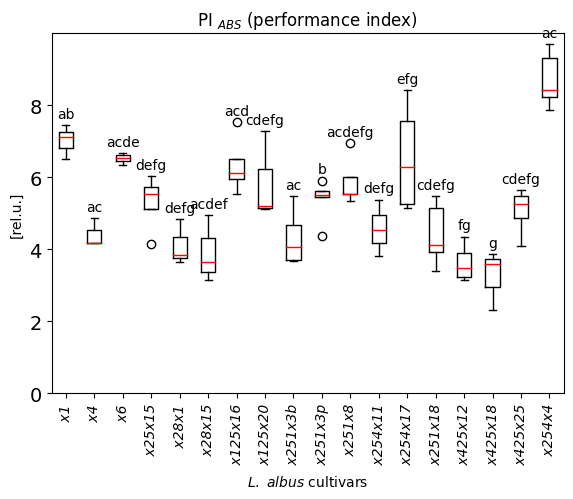

In [467]:
#Now to plot like R with a violing plot
fig,ax=plt.subplots()

#, #patch_artist=True)

#,showmeans=True
#,boxprops=dict(linewidth=2.0),whiskerprops=dict(linewidth=2.0))  #This makes the boxplot

# SORTED: by the array group_order in the set_xticklabels function below!
   #Finds the group names

#props=dict(facecolor='white',alpha=1)

#label_diff(2,6,np.round(result.pvalues[14], 4),ind,menMeans,1)
#label_diff(4,6,np.round(result.pvalues[19], 4),ind,menMeans)

data.boxplot(column=col_for_data, by='Index', ax=ax, fontsize=14,
             medianprops=dict(color='red'),
             boxprops=dict(color='black'),
             whiskerprops=dict(color='black')
             )

draw_letters(y_height, True, 1)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)

ax.set_xticklabels(labels, fontsize=10
                   , style='italic', rotation=90)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
fig.suptitle('')

plt.grid(False)
#fig.savefig('anovatest.jpg',dpi=600,bbox_inches='tight')

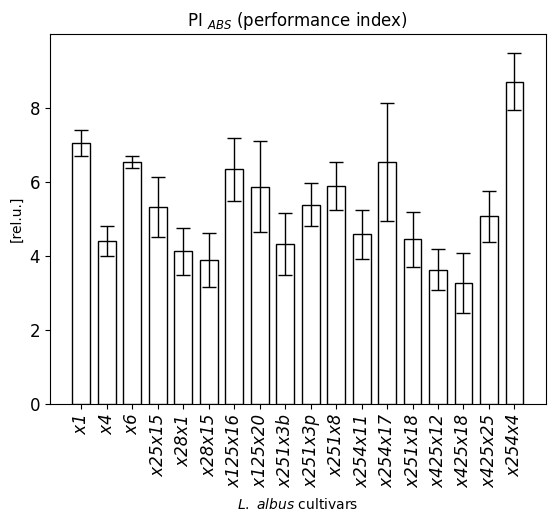

In [474]:
# Pull the formatting out here
bar_kwargs = {'width':width,'color':'white','linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5, 'capthick':1}
#'zorder':0, - only up err bars
#for matplotlib >= v1.4 use 'fmt':'none' instead

fig, ax = plt.subplots()

ax.p1 = plt.bar(ind, menMeans, yerr=menStd, error_kw=err_kwargs, **bar_kwargs)
'''
plt.bar(named, data, color='r')
plt.bar(named, w-data, bottom=transposed_df['e'], color='b')
#ax.errs = plt.errorbar(ind, menMeans, yerr=menStd, **err_kwargs)
'''
#label_diff(4,5,np.round(result.pvalues[0], 4),ind,menMeans)
'''
label_diff(0,2,np.round(result.pvalues[1], 4),ind,menMeans)
label_diff(1,3,np.round(result.pvalues[7], 4),ind,menMeans)

y_text=0.6
left_right=False
label_diff(0,3,np.round(result.pvalues[0], 4),ind,menMeans, y_text=y_text, left_right=left_right)
label_diff(1,3,np.round(result.pvalues[1], 4),ind,menMeans, y_text=y_text, left_right=left_right)
label_diff(2,3,np.round(result.pvalues[2], 4),ind,menMeans, y_text=y_text, left_right=left_right)
'''
#draw_letters(y_height)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)

plt.xticks(ind, labels, color='k')
ax.set_xticklabels(labels, fontsize=12
                   , style='italic', rotation=90)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=12)

fig.suptitle('')
plt.show()

In [475]:
# Variant 2
def label_diff(i,j,text,X,Y):
    y = 1.15*max(Y[i], Y[j])
    props = {'connectionstyle':'bar','arrowstyle':'-',\
                 'shrinkA':10,'shrinkB':10,'linewidth':1}
    ax.annotate(' ns (p=' + str(text) + ')', xy=(X[i],y + y_height*0.07), zorder=10)
    ax.annotate('', xy=(X[i],y), xytext=(X[j],y), arrowprops=props)